# Optimizing monetary policy for central banking using Reinforcement Learning

__Authors:__

Krisha Chandnani

Ignacio Orueta

Leonardo Luksic

## ABSTRACT

This project aims to train and choose an optimal policy for...

## 1 INTRODUCTION

Central banks' main objective is to maintain low inflation while promoting maximum employment. These two objectives are generally seen as complementary. To accomplish this, they set the interest rate levels $i_t$ in each period. The strategy of determining $i_t$ is one of the most debated optimization problems in macroeconomics, which is often described by a simple interest rate reaction function, which responds to inflation and the difference between actual output and the output that maximizes employment (i.e., the output gap). (Taylor, 1993).

However, while this approach tries to represent the actual interest rate setting behaviour of central banks, is still on debate wether this policy function is optimal with respect to fulfilling central banks' objectives given their inflation and output gap targets. (Hinterlang & Tanzer, 2021). The assumption of linear relationships and fixed coefficients in these frameworks often restricts their ability to capture complex, nonlinear economic dynamics. This limitation becomes particularly important during periods of economic volatility, where traditional models may fail to account for structural changes and nonlinearities. (Ballesteros, et al., 2025).

In this project, we follow prior research by Hinterlang & Tanzer (2021) and Ballesteros, et al. (2025) to explore applications of Reinforcement Learning (RL) algorithms to obtain an optimal monetary policy rule for the __XX Central Bank(?)__. Using data from the US Federal Reserve and the Bank of England, respectively, both studies have shown that RL can significantly reduce central bank losses by adapting policies dynamically to economic conditions. As monetary policy can be framed as a sequential decision-making problem, the RL agent can learn from interactions with the environment, optimizing the nominal interest rate to achieve inflation and output gap targets. This study shows that, using data from the __XX Central Bank(?)__, RL-optimized policies outperform traditional rules and, more importantly, historical interest rate paths set by the central bank itself.


## 3 METHODOLOGY

### 3.1 Problem definition

The central's bank objetive is to minimize the gaps between actual and target inflation, and actual and potential output. This can be framed as a RL task, where the central bank determines its optimal reaction function for the nominal interest rate by interacting with the proposed economic environment. This environment evolves based on historical data. (Ballesteros, et al., 2025).

The minimization process led by the central bank operates within a dynamic programming framework. For each time period, the agent receives a reward based on deviations of inflation and the output gap from their respective targets, guiding it to optimize the following loss function:

$$\mathcal{L} = E[∑_{t=0}^T\gamma^t(\omega_\pi(\pi_t-\pi^*)^2 + \omega_y(y_t -y^*)^2)]$$

where $\pi^*$ and $y^∗$ are the inflation and output gap targets, respectively, $\gamma$ is the discount factor, and $\omega_\pi$, $\omega_y$ are weights reflecting the relative importance of stabilizing inflation and the output gap. The reward function is defined explicitly in the environment, where the agent’s action ($i_t$) directly impacts future states of inflation ($\pi_{t+1}$) and the output ($y_{t+1}$), creating a feedback loop that facilitates learning.


## 3.2 Data

In order to create the environment, we use historical data from the __XX Central Bank__, covering the period from __XX to XX__. This data includes quarterly information on inflation rates, output gap estimates, and interest rates.   


### 3.2 RL framework


#### 3.2.1 Markow Decision Process (MDP)

MDPs formally describe an environment for the problem of learning. Here, the agent interacts with a fully observable environment at each discrete time step $t= 0,1,2,3,4...T$. (Sutton & Barto,1998). At each time step $t$, the agent receives some representation of the environment’s state, $S_t$, where $S_t \in S$, and on that basis selects an action, $A_t$, where $A_t \in A(s)$. One time step later, the agent receives a reward, $R_t+1$, where $R \rightarrow R$, and finds itself in a new state, $S_t+1$. The MDP and agent together thereby give rise to a sequence or trajectory that begins like this:

$$S_0,A_0,R_1,S_1,A_1,R_2,S_2,A_2,R_3...$$

Environment state $S$ is a state sequence with an initial state $s_0$. For environment conditions $S$, actions $A$ are accessible. Reward function $R$ is a map of immediate rewards for a given (state, action) pair. The likelihood of transitioning from states $s_0,...,s_i$ to state $s_{i+1}$ is known as state transition probability (P). However, because the environment has endless state sequences, calculating the transition probability for all of them is impossible (Ng, 2003). Therefore, MDP is based on the Markov assumption, which claims that the probability of transitioning to a new state $s_{i+1}$ is only dependent on
$s_i$ instead of past states (Hermanns, 2002), which suggests that:

$$P(s_{i+1}| s_i,a_i,...s_0,a_0) \approx P(s_{i+1}|s_i,a_0)$$


The discount factor $\gamma$ discounts the rewards of future states that contribute to the total reward (Littman, 1994). The formula below can be used to calculate the discounted future rewards:

$$R_t(s) = r_t + \gamma r_{t+1} + \gamma^2 r_{t+2} + ... + \gamma^{n-t} r_{n}=\sum_{t\geq0}\gamma^tR_{a,t}(s_t,s_{t+1})$$
The value function can estimate the value of a state sequence beginning with state $s$:

$$V^\pi(s) = E[\sum_{t\geq0}\gamma^tr_t]$$

The optimal is one that produces the highest value for all states:
$$V^\pi(s) = max_\pi V^\pi(s)$$


#### 3.2.2 Deep Q-Learning (DQN)

Deep Q-Learning extends the basic Q-Learning algorithm by utilizing deep neural networks to approximate Q-values. While traditional Q-Learning is effective for environments with a small and finite number of states (e.g., discrete states), it faces challenges with large or continuous state spaces due to the extensive size of the Q-table. Deep Q-Learning addresses this issue by replacing the Q-table with a neural network, which can approximate Q-values for every state-action pair. (Amin, 2024).

DQN is model-free reinforcement learning algorithm that compares the expected utility of available actions of each state, without requiring a model of the environment (i.e., model-free). It can handle problems with stochastic transitions and rewards without requiring adaptations. (Li, 2023). This algorithm learns the optimal Q-function, based on the Bellman optimality equation. In this project, we focus on the tabular Q-Learning with a finite Markov Decision Process (MDP) and discrete states ($t$) and actions (interest rates). In this case, the Bellman equation suggests the following Q-value function:

$$Q(s,a) = arg \: \underset{a}{\max} \: Q^{\pi^{*}}(s,a)$$

Given a state $s$, the Q-value function estimates the highest future reward achievable by performing action $a$. By considering the maximum discounted future reward for an agent transitioning from state $s_t$ to $s_{t+1}$ with learning rate $\alpha$, the Q-value function can iteratively converge to the optimal Q-value function (Sutton & Barto,1998), as illustrated below:

$$Q_{t+1}(s_t,a_t) = Q(s_t,a_t) + α[r_{t+1} + \gamma \underset{a}{\max} \: Q_t(s_{t+1},a) - Q_t(s_t,a_t)]$$

In this case, the learned action-value function ($Q$) directly approximates $q*$, the optimal action-value function, independent of the policy being followed.

Then, the substitution of the value function and Q-Learning function is shown as:

$$V^*(s) =  \underset{a}{\max} \: Q^*(s,a)$$

And the optimal policy is retrieved from the optimal value function:

$$\pi^*(s) = arg \; \underset{a}{\max} \: Q^*(s,a) $$


### 3.3 Definitions

#### 3.3.1 The environment

The RL framework requires the provision of an environment that determines the next observations in response to the agent's actions (see Figure 1). In our application, the environment represents the economy excluding the central bank. We construct this by using the Gymnasium framework and following Hinterlang & Tanzer (2021) on modelling the economy through two key functions:

$$
y_t = f_{y_t} (y_{t-1},y_{t-2},\pi_{t-1},\pi_{t-2},i_{t-1},i_{t-2}) + \epsilon_{y,t},
$$

$$
\pi_t = f_\pi(y_t,y_{t-1},y_{t-2},\pi_{t-1},\pi_{t-2},i_{t-1}) + \epsilon_{\pi,t},
$$

Where the functions $f_y$ and $f_\pi$ are estimated using machine learning models, __such as linear regression or artificial neural networks (ANNs), to capture both
linear and nonlinear dynamics__.

Figure 1: RL scheme for finding the optimal interest rate in central banking

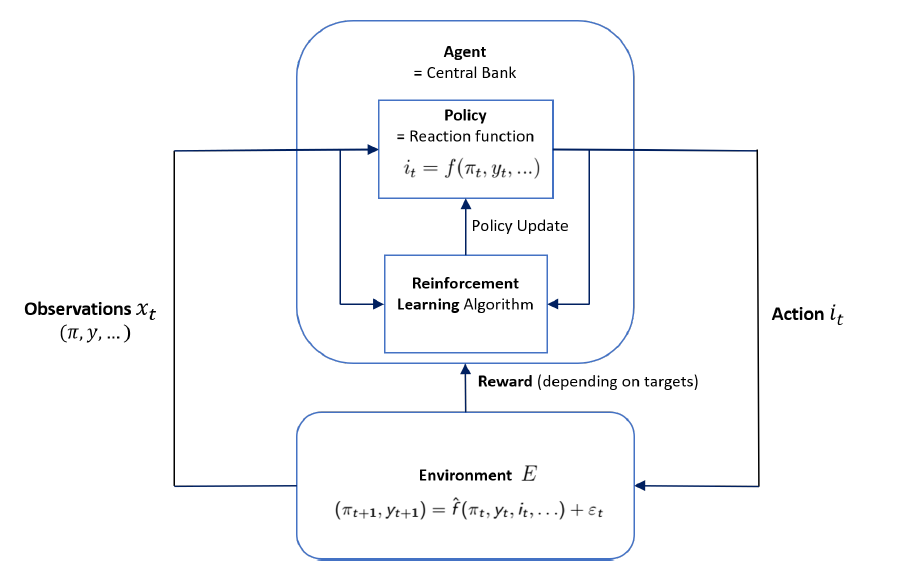

Source: Hinterlang & Tanzer (2021).

#### 3.3.2 The agent
The agent in this framework is the central Bank. It observes certain state variables that serve as inputs to the policy function, but does not know the transition equations. These states variables are the inflation rate ($\pi_t$) and output gap ($y_t-y^*$). Given these observations in each period, the central bank sets a nominal interest rate ($i_t$) and receives a reward, which is derived from the loss function.

#### 3.3.3 The Objective
In order to adjust the monetary policy in an optimal way, we need to determine the respective action value function for each state, as it works as a measure of performance for policy interventions and thus constitutes the basis for policy updates (Hinterlang \& Tanzer, 2021):

$$Q^P(\pi_t,y_t)=\mathbb{E}[R_t|\pi_t,y_t,i_t]$$

with
$$R_t=∑^T_{i=t}\gamma^{i-t}r_t(\pi_t,y_t,i_t)$$

The function $Q^P$ describes the expected return after taking action $i_t$, observing state $\pi_t,y_t$, and following an specific policy thereafter. This recursive relationship is based on the Bellman equation. (Hinterlang & Tanzer, 2021). Then, the return $R_t$ is defined as the sum of discounted future rewards with a discount
factor of $\gamma= 0.99$, which is the mainstream in monetary policy frameworks (Svensson (2020)).

#### 3.3.6 Transitions

We first sample an initial state from historical data. this is useful to emulate different economic contexts. Then, the transition to the next state is given by the inputs of the current state and the predictions of the trained models for next periods' inflation and output gap. Finally, the agent's action and the new state are appended to the dataset.


#### 3.3.4 Action and observation space
The agent selects an action corresponding to the nominal interest rate adjustment, which is set as a positive value. To simplify the problem, we define discrete values for $i_t$ that increase in increments of 0.5.We also set a maximum value of 20, so $i_t$ ranges from 0 to 20.

On the other hand, for each period, the observation space consist of the lagged values of inflation, the output gap and interest rate.

#### 3.3.5 Rewards, goal and evaluation

The rewards function incentivizes the minimization of the deviations of inflation and the output gap:
$$r_t(\pi_t,y_t,i_t)= -\omega_\pi(\pi_{t+1}-\pi^*)^2 -\omega_y(y_t -y^*)^2$$

where $\pi^*=2\%$, and we assign equal weights for each target (i.e., $\omega_\pi=\omega_{y_t}=0.5$).

At the end of each time period, the agent evaluates past actions and adapts future ones accordingly.

## 4 IMPLEMENTATION

Note: We based our code in Ballesteros, et. al., (2025)

In [ ]:
import pandas as pd
import os
import gymnasium as gym
import numpy as np
from gymnasium.spaces import Box, Discrete
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from collections import defaultdict, deque, namedtuple
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import joblib
import matplotlib.dates as mdates
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import random
import time
import math

### 4.1 Environment set up

### Loading and Transforming historical data

To evaluate the model, we use data from the United States Federal Reserve from 01/01/1955 to 01/01/2025.




In [ ]:
#Reading in the documents
deflator = pd.read_csv('/content/GDPDEF.csv', parse_dates=['observation_date'], index_col='observation_date',usecols=['observation_date', 'GDPDEF'])
real_gdp = pd.read_csv('/content/GDPC1.csv', parse_dates=['observation_date'], index_col='observation_date',usecols=['observation_date', 'GDPC1'])
potential_gdp = pd.read_csv('/content/GDPPOT.csv', parse_dates=['observation_date'], index_col='observation_date', usecols=['observation_date', 'GDPPOT'])
bank_rate = pd.read_csv('/content/FEDFUNDS.csv', parse_dates=['observation_date'], index_col='observation_date',usecols=['observation_date', 'FEDFUNDS'])

#Changing column names for better understanding
deflator.columns = ['deflator']
real_gdp.columns = ['real_gdp']
potential_gdp.columns = ['potential_gdp']
bank_rate.columns = ['bank_rate']

In [ ]:
#Combining GDP dataframes
gdp = pd.merge(potential_gdp, real_gdp, on='observation_date')
gdp

,potential_gdp,real_gdp
observation_date,,
1949-01-01,2254.866716,2260.807
1949-04-01,2287.486427,2253.128
1949-07-01,2321.150343,2276.424
1949-10-01,2352.817952,2257.352
1950-01-01,2380.500009,2346.104
...,...,...
2023-01-01,22208.242540,22403.435
2023-04-01,22333.112390,22539.418
2023-07-01,22459.740680,22780.933


In [ ]:
#Computing Inflation (Using Deflator), Output Gap (Using Real and Potential GDP) and Resampling Bank Rate
#Inflation
inflation = deflator.pct_change(periods=4) * 100
inflation_q = inflation.resample('QE').last()

#Output Gap
output_gap = (gdp["real_gdp"] - gdp["potential_gdp"]) / gdp["potential_gdp"] * 100
output_gap_q = output_gap.resample('QE').last()

#Bank Rate
bank_rate_q = bank_rate.resample('QE').mean()

In [ ]:
#Combining the dataframes into 1
historical = pd.concat([inflation_q, output_gap_q, bank_rate_q], axis = 1)
#historical = pd.concat(historical, bank_rate_q, on = "observation_date")
historical.columns = ['inflation', 'output_gap', 'bank_rate'] #Renaming the columns
historical = historical.dropna()

#Inspecting the dataset
historical

,inflation,output_gap,bank_rate
observation_date,,,
1954-09-30,0.727219,-1.570996,1.030000
1954-12-31,0.814754,-0.255623,0.986667
1955-03-31,0.967218,1.983082,1.343333
1955-06-30,1.290941,2.980351,1.500000
1955-09-30,1.863857,3.720764,1.940000
...,...,...,...
2023-03-31,5.326662,0.878919,4.516667
2023-06-30,3.459582,0.923766,4.990000
2023-09-30,3.116994,1.430080,5.260000


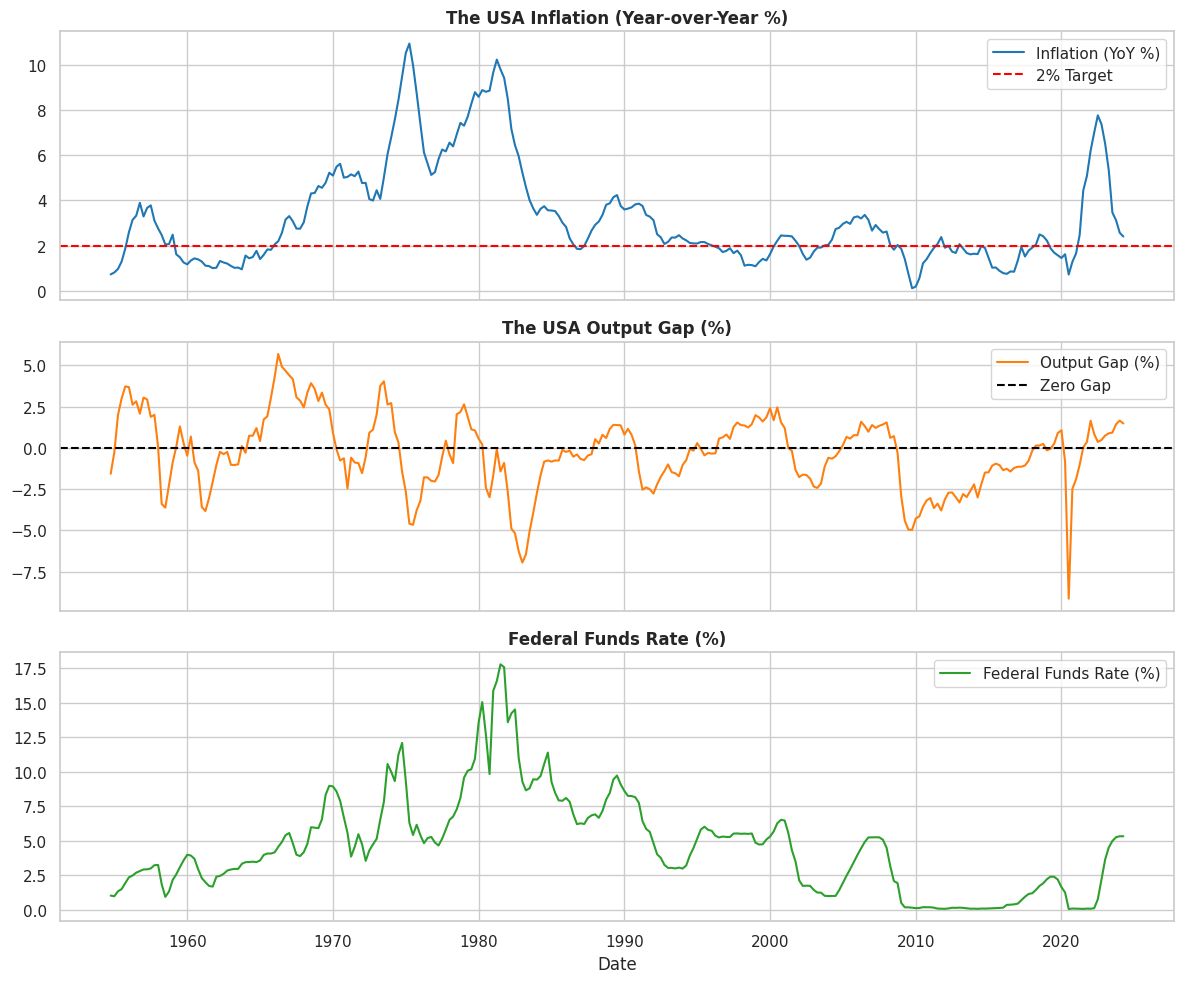

In [ ]:
#Plotting the data series for verification
sns.set_theme(style='whitegrid')
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Inflation plot
axes[0].plot(historical.index, historical['inflation'], label='Inflation (YoY %)', color='tab:blue')
axes[0].axhline(2, color='red', linestyle='--', label='2% Target')
axes[0].set_title('The USA Inflation (Year-over-Year %)', fontweight = "bold")
axes[0].legend()

# Output Gap plot
axes[1].plot(historical.index, historical['output_gap'], label='Output Gap (%)', color='tab:orange')
axes[1].axhline(0, color='black', linestyle='--', label='Zero Gap')
axes[1].set_title('The USA Output Gap (%)', fontweight = "bold")
axes[1].legend()

# Bank Rate plot
axes[2].plot(historical.index, historical['bank_rate'], label='Federal Funds Rate (%)', color='tab:green')
axes[2].set_title('Federal Funds Rate (%)', fontweight = "bold")
axes[2].set_xlabel('Date')
axes[2].legend()

plt.tight_layout()
plt.show()

In [ ]:
#Creating lags for the variables
historical['L1_y'] = historical['output_gap'].shift(1)
historical['L2_y'] = historical['output_gap'].shift(2)
historical['L1_pi'] = historical['inflation'].shift(1)
historical['L2_pi'] = historical['inflation'].shift(2)
historical['L1_i'] = historical['bank_rate'].shift(1)
historical['L2_i'] = historical['bank_rate'].shift(2)

#Drop rows with NaN values created due to lagging
historical = historical.dropna()

### Fitting OLS to the data

Output Gap Model Summary:
                            OLS Regression Results                            
Dep. Variable:             output_gap   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     308.0
Date:                Sat, 03 May 2025   Prob (F-statistic):           2.37e-81
Time:                        12:54:20   Log-Likelihood:                -236.14
No. Observations:                 193   AIC:                             482.3
Df Residuals:                     188   BIC:                             498.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5515     

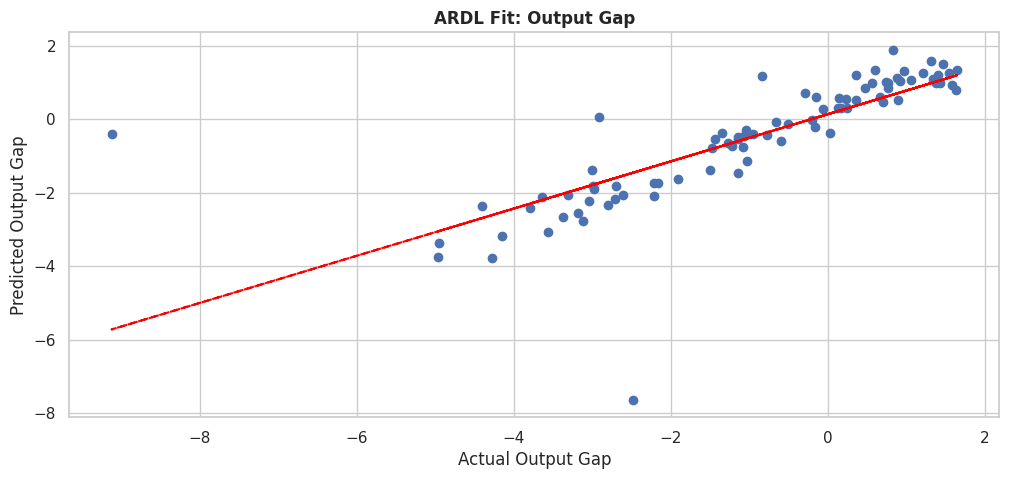

In [ ]:
#Linear Model (ARDL) Implementation
#Output Gap
split_index = int(len(historical) * 0.7)
train_data = historical.iloc[:split_index]
test_data = historical.iloc[split_index:]

# Then define your X and y for train/test from these splits
# Example for Output Gap:
X_y_cols = ['L1_y', 'L1_pi', 'L1_i', 'L2_i'] # Add 'const' later
y_y_col = 'output_gap'

Xy_train = train_data[X_y_cols]
yy_train = train_data[y_y_col]
Xy_test = test_data[X_y_cols]
yy_test = test_data[y_y_col]
X_y = historical[X_y_cols]
y_y = historical[y_y_col]

Xy_train = sm.add_constant(Xy_train, has_constant='add')
Xy_test = sm.add_constant(Xy_test, has_constant='add')
X_y = sm.add_constant(X_y, has_constant='add')

sm_model_y = sm.OLS(yy_train, Xy_train).fit()
print("Output Gap Model Summary:")
print(sm_model_y.summary())

y_pred_y = sm_model_y.predict(Xy_test)
mse_y = mean_squared_error(yy_test, y_pred_y)

print(f"\nARDL (OLS) Output Gap MSE: {mse_y:.4f}")

fig, ax1 = plt.subplots(1, figsize=(12,5))
ax1.scatter(yy_test, y_pred_y)
ax1.set_xlabel('Actual Output Gap'); ax1.set_ylabel('Predicted Output Gap')
ax1.set_title('ARDL Fit: Output Gap', fontweight = "bold")
slope, intercept = np.polyfit(yy_test, y_pred_y, 1)
x_vals = np.array(yy_test)
y_fit = slope * x_vals + intercept
ax1.plot(x_vals, y_fit, color='red', linestyle='--', label='Best Fit Line')


Inflation Model Summary:
                            OLS Regression Results                            
Dep. Variable:              inflation   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     1437.
Date:                Sat, 03 May 2025   Prob (F-statistic):          1.35e-157
Time:                        12:54:35   Log-Likelihood:                -54.621
No. Observations:                 193   AIC:                             125.2
Df Residuals:                     185   BIC:                             151.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0534     

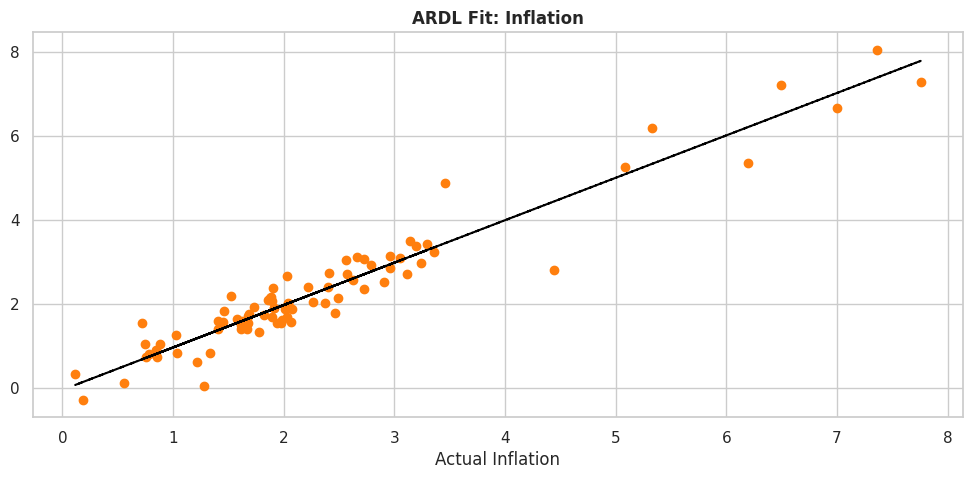

In [ ]:
#Linear Model (ARDL) Implementation
#Inflation
split_index = int(len(historical) * 0.7)
train_data = historical.iloc[:split_index]
test_data = historical.iloc[split_index:]

X_pi_cols = ['output_gap', 'L1_y', 'L2_y', 'L1_pi', 'L2_pi', 'L1_i','L2_i'] # Add 'const' later
y_pi_col = 'inflation'

Xpi_train = train_data[X_pi_cols]
ypi_train = train_data[y_pi_col]
Xpi_test = test_data[X_pi_cols]
ypi_test = test_data[y_pi_col]
X_pi = historical[X_pi_cols]
y_pi = historical[y_pi_col]

Xpi_train = sm.add_constant(Xpi_train, has_constant='add')
Xpi_test = sm.add_constant(Xpi_test, has_constant='add')
X_pi = sm.add_constant(X_pi, has_constant='add')

sm_model_pi = sm.OLS(ypi_train, Xpi_train).fit()
print("\nInflation Model Summary:")
print(sm_model_pi.summary())

y_pred_pi = sm_model_pi.predict(Xpi_test)
mse_pi = mean_squared_error(ypi_test, y_pred_pi)

print(f"\nARDL (OLS) Inflation MSE: {mse_pi:.4f}")

fig, ax2 = plt.subplots(1, figsize=(12,5))
ax2.scatter(ypi_test, y_pred_pi, color = "tab:orange")
ax2.set_xlabel('Actual Inflation'); ax1.set_ylabel('Predicted Inflation')
ax2.set_title('ARDL Fit: Inflation', fontweight = "bold")
slope, intercept = np.polyfit(ypi_test, y_pred_pi, 1)
x_vals = np.array(ypi_test)
y_fit = slope * x_vals + intercept
ax2.plot(x_vals, y_fit, color='black', linestyle='--', label='Best Fit Line')

### Fitting A Neural Network to the Data


--- Training Output Gap ANN ---
Output Gap Features Scaled.
Fitting Output Gap MLP...
Fitting complete.
Output-gap Neural Network MSE (scaled): 1.4275


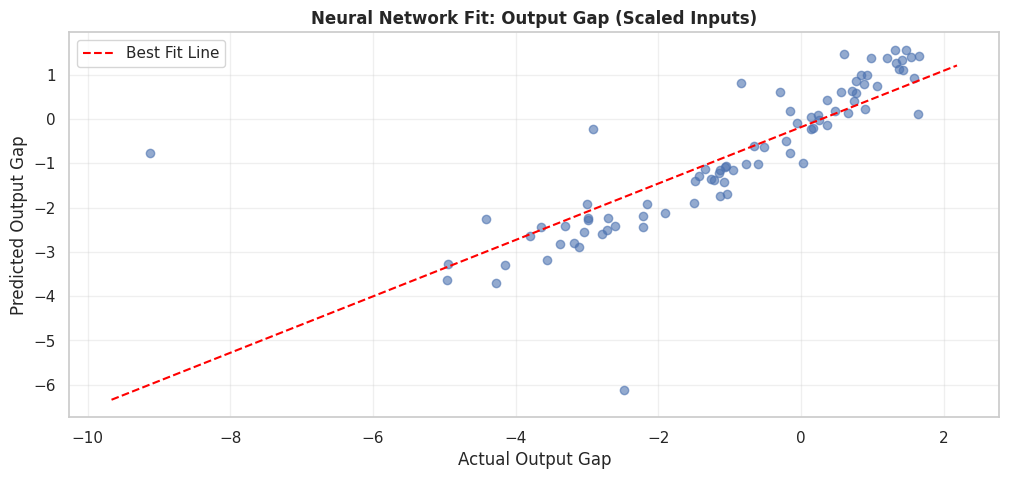

In [ ]:
# --- Sequential Split (Done ONCE) ---
split_index = int(len(historical) * 0.7)
train_data = historical.iloc[:split_index]
test_data = historical.iloc[split_index:]

# --- Output Gap ANN Model ---
print("\n--- Training Output Gap ANN ---")
X_y_cols = ['L1_y', 'L1_pi', 'L1_i', 'L2_i']
y_y_col = 'output_gap'

# Separate features and target
Xy_train_raw = train_data[X_y_cols]
yy_train = train_data[y_y_col]
Xy_test_raw = test_data[X_y_cols]
yy_test = test_data[y_y_col]
Xy = historical[X_y_cols]
yy = historical[y_y_col]

# --- Feature Scaling (Output Gap) --- <<< ADDED
scaler_y = StandardScaler()
# Fit scaler ONLY on training data
Xy_train_scaled = scaler_y.fit_transform(Xy_train_raw)
# Transform test data using the SAME fitted scaler
Xy_test_scaled = scaler_y.transform(Xy_test_raw)
print("Output Gap Features Scaled.")
# --- End Scaling ---

# Instantiate MLP Regressor
mlp_y = MLPRegressor(
    hidden_layer_sizes=(125, 62), # Example: Slightly larger network
    activation='relu',
    solver='adam',
    learning_rate_init=0.001, # Explicitly set learning rate
    max_iter=2000,
    random_state=455,
    early_stopping=True, # Helps prevent overfitting
    n_iter_no_change=20 # Stop if validation score doesn't improve
)

# Train on SCALED data <<< CORRECTED
print("Fitting Output Gap MLP...")
mlp_y.fit(Xy_train_scaled, yy_train)
print("Fitting complete.")

# Predict on SCALED test data <<< CORRECTED
y_y_pred = mlp_y.predict(Xy_test_scaled)

# Evaluate
mse_y_ann = mean_squared_error(yy_test, y_y_pred)
print(f"Output-gap Neural Network MSE (scaled): {mse_y_ann:.4f}")

# Plotting (Actual vs Predicted)
fig, ax1 = plt.subplots(1, figsize=(12,5))
ax1.scatter(yy_test, y_y_pred, alpha=0.6)
ax1.set_xlabel('Actual Output Gap'); ax1.set_ylabel('Predicted Output Gap')
ax1.set_title('Neural Network Fit: Output Gap (Scaled Inputs)', fontweight = "bold")
# Add a line y=x for reference
lims = [ min(ax1.get_xlim()[0], ax1.get_ylim()[0]), max(ax1.get_xlim()[1], ax1.get_ylim()[1]) ]
#ax1.plot(lims, lims, 'k--', alpha=0.75, zorder=0, label='Ideal Fit (y=x)')
#Best fit line (optional)
slope, intercept = np.polyfit(yy_test, y_y_pred, 1)
x_vals = np.array(lims) # Use axis limits for line extent
y_fit = slope * x_vals + intercept
ax1.plot(x_vals, y_fit, color='red', linestyle='--', label='Best Fit Line')
ax1.legend()
ax1.grid(True, alpha=0.3)
plt.show()


--- Training Inflation ANN ---
Inflation Features Scaled.
Fitting Inflation MLP...
Fitting complete.
Inflation Neural Network MSE (scaled): 0.3754


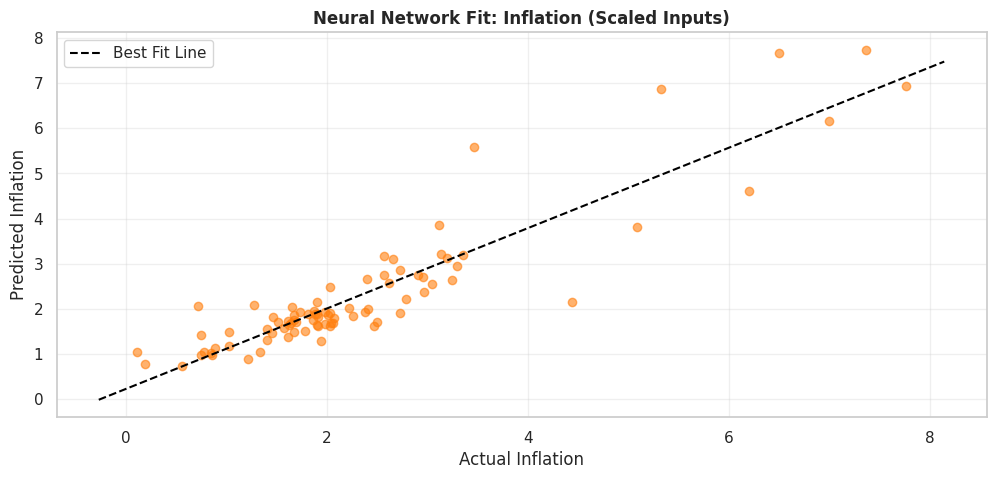

In [ ]:
# --- Inflation ANN Model ---
print("\n--- Training Inflation ANN ---")
X_pi_cols = ['output_gap', 'L1_y', 'L2_y', 'L1_pi', 'L2_pi', 'L1_i','L2_i']
y_pi_col = 'inflation'

# Separate features and target
Xpi_train_raw = train_data[X_pi_cols]
ypi_train = train_data[y_pi_col]
Xpi_test_raw = test_data[X_pi_cols]
ypi_test = test_data[y_pi_col]
Xpi = historical[X_pi_cols]
ypi = historical[y_pi_col]

# --- Feature Scaling (Inflation) --- <<< ADDED
scaler_pi = StandardScaler()
# Fit scaler ONLY on training data
Xpi_train_scaled = scaler_pi.fit_transform(Xpi_train_raw)
# Transform test data using the SAME fitted scaler
Xpi_test_scaled = scaler_pi.transform(Xpi_test_raw)
print("Inflation Features Scaled.")
# --- End Scaling ---

# Instantiate MLP Regressor
mlp_pi = MLPRegressor(
    hidden_layer_sizes=(130, 65), # Example: Slightly larger network
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=2000,
    random_state=455,
    early_stopping=True,
    n_iter_no_change=20
)

# Train on SCALED data <<< CORRECTED
print("Fitting Inflation MLP...")
mlp_pi.fit(Xpi_train_scaled, ypi_train)
print("Fitting complete.")

# Predict on SCALED test data <<< CORRECTED
y_pi_pred = mlp_pi.predict(Xpi_test_scaled)

# Evaluate
mse_pi_ann = mean_squared_error(ypi_test, y_pi_pred)
print(f"Inflation Neural Network MSE (scaled): {mse_pi_ann:.4f}")

# Plotting (Actual vs Predicted)
fig, ax2 = plt.subplots(1, figsize=(12,5))
ax2.scatter(ypi_test, y_pi_pred, color = "tab:orange", alpha=0.6)
ax2.set_xlabel('Actual Inflation'); ax2.set_ylabel('Predicted Inflation')
ax2.set_title('Neural Network Fit: Inflation (Scaled Inputs)', fontweight = "bold")
# Add a line y=x for reference
lims = [ min(ax2.get_xlim()[0], ax2.get_ylim()[0]), max(ax2.get_xlim()[1], ax2.get_ylim()[1]) ]
#ax2.plot(lims, lims, 'k--', alpha=0.75, zorder=0, label='Ideal Fit (y=x)')
# Best fit line (optional)
slope, intercept = np.polyfit(ypi_test, y_pi_pred, 1)
x_vals = np.array(lims)
y_fit = slope * x_vals + intercept
ax2.plot(x_vals, y_fit, color='black', linestyle='--', label='Best Fit Line')
ax2.legend()
ax2.grid(True, alpha=0.3)
plt.show()

### Comparison between Linear Regression and Neural Network

In [ ]:
mse_svar_total = 0.5*(mse_y + mse_pi)
mse_ann_total  = 0.5*(mse_y_ann + mse_pi_ann)
improvement   = (mse_svar_total - mse_ann_total) / mse_svar_total * 100
print(f"ANN reduces total MSE by {improvement:.2f}% compared to SVAR")

ANN reduces total MSE by 10.62% compared to SVAR


During the rest of the project, ANN is used, since it reduces the error rate by approximately 11%.

### Refitting the Entire Data to A Neural Network

In [ ]:
ann_model_y = mlp_y.fit(Xy, yy)
ann_model_pi = mlp_pi.fit(Xpi, ypi)

### Defining the environment

Note: this code is based on previous work from Ballesteros, et al., (2025): https://github.com/Sebastian-Ballesteros/ST449_Project

In [ ]:
environment = historical[["inflation", "output_gap", "bank_rate"]]
environment

,inflation,output_gap,bank_rate
observation_date,,,
1955-03-31,0.967218,1.983082,1.343333
1955-06-30,1.290941,2.980351,1.500000
1955-09-30,1.863857,3.720764,1.940000
1955-12-31,2.593491,3.673726,2.356667
1956-03-31,3.137112,2.610879,2.483333
...,...,...,...
2023-03-31,5.326662,0.878919,4.516667
2023-06-30,3.459582,0.923766,4.990000
2023-09-30,3.116994,1.430080,5.260000


In [ ]:
class EconomyEnv(gym.Env):
    """
    Custom Gymnasium Environment for simulating Central Bank Monetary Policy.
    Uses pre-trained OLS models for inflation and output gap dynamics.
    Assumes models were trained with a 2-period lag structure.
    """
    metadata = {"render_modes": [], "render_fps": 1}

    def __init__(
        self,
        model_y,            #Trained ANN for output gap
        model_pi,           #Trained ANN for inflation
        historical_df,
        lookback_periods=2, #Number of periods in state
        inflation_target=2.0,
        output_gap_target=0.0,
        max_steps=50,       #Maximum steps per episode
        mode='discrete',    #Action mode ('discrete' required for DQN)
        min_i=0,            #Lower bound for interest rate action
        max_i=20            #Upper bound for interest rate action
    ):

        super().__init__()

        #Storing the model
        self.model_y = ann_model_y  #Assigning input argument ann_model_y to self.model_y
        self.model_pi = ann_model_pi #Assigning input argument ann_model_pi to self.model_pi

        #Ensuring that the dataframe has all the necessary columns
        required_cols = ['inflation', 'output_gap', 'bank_rate']
        if not all(col in historical_df.columns for col in required_cols):
             raise ValueError(f"historical_df must contain columns: {required_cols}")
        self.historical_df = historical_df[required_cols].dropna().reset_index(drop=True).copy()

        #Initialising environment parameters
        self.lookback_periods = lookback_periods
        self.inflation_target = inflation_target
        self.output_gap_target = output_gap_target
        self.max_steps = max_steps
        self.mode = mode

        if self.lookback_periods != 2:
            raise ValueError("This env requires lookback_periods=2 for the OLS models.")

        self.infl_col = 'inflation'
        self.gap_col  = 'output_gap'
        self.rate_col = 'bank_rate'
        self.state_variable_cols = [self.infl_col, self.gap_col, self.rate_col]

        #Ensuring discrete actions
        if self.mode == 'discrete':
            self.values = np.linspace(min_i, max_i, num=41)
            self.action_space = gym.spaces.Discrete(len(self.values))
        else: raise ValueError("DQN requires mode='discrete'.")

        obs_space_size = len(self.state_variable_cols) * self.lookback_periods
        self.observation_space = gym.spaces.Box(
            low=-np.inf, high= np.inf, shape=(obs_space_size,), dtype= np.float32
            )

        self.df = None
        self.current_idx = 0
        self.episode_step = 0

    #Defining a function for environment reset
    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        max_start_index = len(self.historical_df) - self.lookback_periods
        if max_start_index < 0: raise ValueError(f"Not enough historical data.")
        start_idx = self.np_random.integers(0, max_start_index + 1)
        self.df = self.historical_df.iloc[start_idx : start_idx + self.lookback_periods].reset_index(drop=True).copy()
        self.current_idx = self.lookback_periods - 1
        self.episode_step = 0
        obs = self._get_state()
        info = self._get_info()
        return obs, info

    #Defining a function to take a step
    def step(self, action):
        self.episode_step += 1

        #Ensuring a valid action space
        if isinstance(self.action_space, gym.spaces.Discrete):
            if not (0 <= action < len(self.values)): raise ValueError(f"Invalid action: {action}.")
            interest_rate = float(self.values[action])
        else: raise TypeError("Unsupported action space")

        start_row_idx = self.current_idx - self.lookback_periods + 1
        end_row_idx = self.current_idx + 1
        current_rows = self.df.iloc[start_row_idx : end_row_idx]
        if len(current_rows) != self.lookback_periods: raise ValueError(f"Step error: row mismatch")

        infl_t2, gap_t2, rate_t2 = current_rows.iloc[0][self.infl_col], current_rows.iloc[0][self.gap_col], current_rows.iloc[0][self.rate_col]
        infl_t1, gap_t1, rate_t1 = current_rows.iloc[1][self.infl_col], current_rows.iloc[1][self.gap_col], current_rows.iloc[1][self.rate_col]

        #Output Gap
        features_y_dict = {'L1_y': [gap_t1],'L1_pi': [infl_t1],'L1_i': [rate_t1],'L2_i': [rate_t2]}
        features_y = pd.DataFrame(features_y_dict)
        try: next_gap = self.model_y.predict(features_y)[0]
        except Exception as e: print("Error predicting gap:", e); raise e

        #Inflation
        features_pi_dict = {'output_gap': [next_gap],'L1_y': [gap_t1],'L2_y': [gap_t2], 'L1_pi': [infl_t1],'L2_pi': [infl_t2],'L1_i': [rate_t1],'L2_i': [rate_t2]}
        features_pi = pd.DataFrame(features_pi_dict)
        try: next_infl = self.model_pi.predict(features_pi)[0]
        except Exception as e: print("Error predicting inflation:", e); raise e

        #Defining the reward function
        reward = -(0.5 * (next_infl - self.inflation_target)**2 + 0.5 * (next_gap - self.output_gap_target)**2)

        new_row = {self.infl_col: next_infl, self.gap_col: next_gap, self.rate_col: interest_rate}
        self.df = pd.concat([self.df, pd.DataFrame([new_row])], ignore_index=True)
        self.current_idx += 1

        terminated = self.episode_step >= self.max_steps
        truncated = False
        next_obs = self._get_state()
        info = self._get_info()
        return next_obs, reward, terminated, truncated, info

    #Defining a function to get the state
    def _get_state(self):
        if self.df is None or len(self.df) < self.lookback_periods:
             return np.zeros(self.observation_space.shape, dtype=self.observation_space.dtype)
        start_row_idx = self.current_idx - self.lookback_periods + 1
        end_row_idx = self.current_idx + 1
        rows = self.df.iloc[start_row_idx : end_row_idx]
        if len(rows) != self.lookback_periods:
            raise ValueError(f"_get_state error: Rows={len(rows)}, Idx={self.current_idx}, df len={len(self.df)}")
        state_array = rows[self.state_variable_cols].to_numpy().flatten()
        return state_array.astype(self.observation_space.dtype)

    #Defining a function to receive info according to the step taken
    def _get_info(self):
        current_vals = self.df.iloc[self.current_idx][self.state_variable_cols].to_dict()
        info = {"current_step": self.episode_step}
        info.update(current_vals)
        return info

    def render(self): pass
    def close(self): pass

### Testing the Environment

In [ ]:
env = EconomyEnv(
    historical_df=environment,
    model_y= ann_model_y,
    model_pi= ann_model_pi,
    lookback_periods=2,
    inflation_target=2,
    output_gap_target=0.0,
    max_steps=50, #50 steps per episode
    mode="discrete",
    min_i=0,
    max_i=20
)

#Test Reset
print("Testing Reset...")
obs, info = env.reset() # Use seed for reproducibility
print("Initial Observation:", obs)
print("Initial Info:", info)
print("Initial internal df (first few rows):")
print(env.df.head())
assert obs.shape == env.observation_space.shape, "Observation shape mismatch"
assert len(env.df) == env.lookback_periods, "Initial df length mismatch"

#Test Step
print("\nTesting Step...")
action = env.action_space.sample() # Take a random valid action
print(f"Action taken (index): {action}, Corresponding rate: {env.values[action]:.2f}")
next_obs, reward, terminated, truncated, info = env.step(action)

print("Next Observation:", next_obs)
print(f"Reward: {reward:.4f}")
print(f"Terminated: {terminated}")
print(f"Truncated: {truncated}")
print("Info:", info)
print("Internal df after step (last few rows):")
print(env.df.tail()) # Show the newly added row

assert next_obs.shape == env.observation_space.shape, "Next observation shape mismatch"
assert len(env.df) == env.lookback_periods + 1, "df length after step mismatch"
assert info['current_step'] == 1, "Step count mismatch"

Testing Reset...
Initial Observation: [ 2.1556869  -0.45334366  6.02        2.0734138  -0.30957165  5.7966666 ]
Initial Info: {'current_step': 0, 'inflation': 2.0734137548108267, 'output_gap': -0.30957166778057, 'bank_rate': 5.796666666666667}
Initial internal df (first few rows):
   inflation  output_gap  bank_rate
0   2.155687   -0.453344   6.020000
1   2.073414   -0.309572   5.796667

Testing Step...
Action taken (index): 11, Corresponding rate: 5.50
Next Observation: [ 2.0734138  -0.30957165  5.7966666   2.0431232  -0.5629264   5.5       ]
Reward: -0.1594
Terminated: False
Truncated: False
Info: {'current_step': 1, 'inflation': 2.0431231530701854, 'output_gap': -0.5629264175370877, 'bank_rate': 5.5}
Internal df after step (last few rows):
   inflation  output_gap  bank_rate
0   2.155687   -0.453344   6.020000
1   2.073414   -0.309572   5.796667
2   2.043123   -0.562926   5.500000


### 4.2 Deep Q-Network (DQN)

### DQN components

In [ ]:
#Defining the transition tuple
Transition = namedtuple('Transition', ('state', 'action', 'next_state', 'reward', 'done'))

#Replay buffer
class ReplayBuffer:
    def __init__(self, capacity): self.memory = deque([], maxlen=capacity)
    def push(self, *args): self.memory.append(Transition(*args))
    def sample(self, batch_size):
        actual_batch_size = min(len(self.memory), batch_size)
        if actual_batch_size == 0: return []
        return random.sample(self.memory, actual_batch_size)
    def __len__(self): return len(self.memory)

#Setting up the Q network
class QNetwork(nn.Module):
    def __init__(self, n_observations, n_actions, hidden_dim=128):
        super(QNetwork, self).__init__()
        self.layer1 = nn.Linear(n_observations, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)
        self.layer3 = nn.Linear(hidden_dim, n_actions)
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        return self.layer3(x)

### DQN Agent

In [ ]:
#Setting up the DQN Agent
class DQNAgent:
    def __init__(self, env, state_mean, state_std, buffer_capacity, batch_size, gamma,
                 eps_start, eps_end, eps_decay_steps, learning_rate, target_update_freq, hidden_dim):
        self.env = env
        self.state_dim = env.observation_space.shape[0]
        self.action_dim = env.action_space.n
        self.buffer = ReplayBuffer(buffer_capacity)
        self.batch_size = batch_size
        self.gamma = gamma #Discount factor
        self.eps_start = eps_start #Initial epsilon for the e-greedy policy
        self.eps_end = eps_end #Final epsilon for the e-greedy policy
        self.eps_decay_steps = eps_decay_steps
        self.target_update_freq = target_update_freq #Values update after x episodes
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu") #Defining pytorch setup

        print(f"Using device: {self.device}")

        self.state_mean = torch.tensor(state_mean, dtype=torch.float32, device=self.device) #Normalised statistics using tensor flow
        self.state_std = torch.tensor(state_std, dtype=torch.float32, device=self.device) #Normalised statistics using tensor flow

        print(f"  State Mean loaded: {self.state_mean.cpu().numpy()}")
        print(f"  State Std loaded: {self.state_std.cpu().numpy()}")

        self.policy_net = QNetwork(self.state_dim, self.action_dim, hidden_dim).to(self.device) #Initialising Q network
        self.target_net = QNetwork(self.state_dim, self.action_dim, hidden_dim).to(self.device)
        self.target_net.load_state_dict(self.policy_net.state_dict())
        self.target_net.eval()
        self.optimizer = optim.AdamW(self.policy_net.parameters(), lr=learning_rate, amsgrad=True)
        self.loss_fn = nn.SmoothL1Loss()
        self.steps_done = 0

    #Defining function for selecting an action
    def select_action(self, state):
        sample = random.random()
        epsilon = self.eps_end + (self.eps_start - self.eps_end) * math.exp(-1. * self.steps_done / self.eps_decay_steps)
        self.steps_done += 1
        if sample > epsilon: # Exploit
            with torch.no_grad():
                state_tensor = torch.tensor(state, dtype=torch.float32, device=self.device)
                normalized_state = (state_tensor - self.state_mean) / self.state_std
                action = self.policy_net(normalized_state.unsqueeze(0)).max(1)[1].view(1, 1)
                return action.item()
        else: # Explore
            return self.env.action_space.sample()

    #Defining transition buffer
    def store_transition(self, state, action, next_state, reward, done):
        self.buffer.push(state, action, next_state, reward, done)

    #Defining function to update the model
    def update_model(self):
        if len(self.buffer) < self.batch_size: return None
        transitions = self.buffer.sample(self.batch_size)

        if not transitions: return None
        batch = Transition(*zip(*transitions))
        state_batch = torch.tensor(np.array(batch.state), dtype=torch.float32, device=self.device)
        action_batch = torch.tensor(batch.action, dtype=torch.long, device=self.device).unsqueeze(1)
        next_state_batch = torch.tensor(np.array(batch.next_state), dtype=torch.float32, device=self.device)
        reward_batch = torch.tensor(batch.reward, dtype=torch.float32, device=self.device).unsqueeze(1)
        done_batch = torch.tensor(batch.done, dtype=torch.bool, device=self.device)
        normalized_state_batch = (state_batch - self.state_mean) / self.state_std
        normalized_next_state_batch = (next_state_batch - self.state_mean) / self.state_std
        state_action_values = self.policy_net(normalized_state_batch).gather(1, action_batch)

        with torch.no_grad():
            next_state_q_values = self.target_net(normalized_next_state_batch)
            max_next_state_values = next_state_q_values.max(1)[0]
        next_state_values_masked = max_next_state_values * (~done_batch)
        expected_state_action_values = reward_batch + (next_state_values_masked.unsqueeze(1) * self.gamma)
        loss = self.loss_fn(state_action_values, expected_state_action_values)

        if torch.isnan(loss): print("!!! WARNING: Loss is NaN!"); return None
        self.optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_value_(self.policy_net.parameters(), 100)
        self.optimizer.step()

        return loss.item()

    #Defining function to update state values
    def update_target_network(self):
        self.target_net.load_state_dict(self.policy_net.state_dict())


### Training

In [ ]:
if 'ann_model_y' not in locals() or not hasattr(ann_model_y, 'predict'): raise NameError("Fitted model 'ols_model_y' not found.")
if 'ann_model_pi' not in locals() or not hasattr(ann_model_pi, 'predict'): raise NameError("Fitted model 'ols_model_pi' not found.")
print("Using pre-defined 'ann_model_y' and 'ann_model_pi'.")

# Hyperparameters for EconomyEnv
N_EPISODES = 3000  #Number of episodes
BUFFER_CAPACITY = 100000
BATCH_SIZE = 128
GAMMA = 0.99 #Discount factor
MAX_STEPS_PER_EPISODE = 75 #Number of steps per episodes
total_expected_steps = N_EPISODES * MAX_STEPS_PER_EPISODE #Total number of steps
EPS_START = 1.0 #Initial epsilon for e-greedy policy
EPS_END = 0.1 #Final epsilon for e-greedy policy
EPS_DECAY_STEPS = int(total_expected_steps * 0.65) #Decaying epsilon over 75% of the steps
LEARNING_RATE = 1e-4
TARGET_UPDATE_FREQ = 10
HIDDEN_DIM = 256 #Network dimension
TRAIN_START_MIN_BUFFER = 2000

#Instantiating the environment
print("Instantiating Economy Environment...")
env = EconomyEnv(
    historical_df=environment, #Using environment data
    model_y= ann_model_y, #Using ann model for output gap
    model_pi= ann_model_pi, #Using ann model for inflation
    max_steps=MAX_STEPS_PER_EPISODE
)

#Calculating state normalisation stats
print("Calculating state normalization statistics...")
temp_env_for_norm = EconomyEnv( historical_df=environment, model_y=ann_model_y, model_pi=ann_model_pi)
num_samples_for_norm = 10000
sampled_states = []

print(f"Sampling {num_samples_for_norm} initial states...")

for i in range(num_samples_for_norm):
    obs, _ = temp_env_for_norm.reset(seed=i)
    sampled_states.append(obs)
sampled_states = np.array(sampled_states)
state_mean = np.mean(sampled_states, axis=0)
state_std = np.std(sampled_states, axis=0)
state_std[state_std < 1e-6] = 1.0 #Preventing division by 0
print(f"  State Mean: {state_mean}")
print(f"  State Std: {state_std}")
temp_env_for_norm.close()

#Instantiating the environment
print("\nInstantiating DQN Agent for EconomyEnv...")
agent = DQNAgent( env=env, state_mean=state_mean, state_std=state_std,
    buffer_capacity=BUFFER_CAPACITY, batch_size=BATCH_SIZE, gamma=GAMMA,
    eps_start=EPS_START, eps_end=EPS_END, eps_decay_steps=EPS_DECAY_STEPS,
    learning_rate=LEARNING_RATE, target_update_freq=TARGET_UPDATE_FREQ, hidden_dim=HIDDEN_DIM )

#Setting up the training loop
print(f"\nStarting Training on EconomyEnv for {N_EPISODES} episodes...")
episode_rewards = [] #Empty list to save episode rewards
episode_losses = [] #Empty list to save losses
training_start_time = time.time()
log_interval = 50

for i_episode in range(N_EPISODES):
    state, info = env.reset(seed=i_episode) #Setting seed for variety in this case
    episode_reward = 0
    episode_loss_sum = 0.0
    steps_in_episode = 0
    num_updates = 0
    terminated = False
    truncated = False

    while not terminated and not truncated:
        action_idx = agent.select_action(state)
        observation, reward, terminated, truncated, info = env.step(action_idx)
        done = terminated or truncated #Using combined flag for buffer

        episode_reward += reward
        agent.store_transition(state, action_idx, observation, reward, done)
        state = observation

        if len(agent.buffer) >= TRAIN_START_MIN_BUFFER:
             loss = agent.update_model()
             if loss is not None:
                 episode_loss_sum += loss
                 num_updates += 1

        steps_in_episode += 1

    episode_rewards.append(episode_reward) #Saving the reward per episode
    avg_loss = episode_loss_sum / num_updates if num_updates > 0 else 0 #Computing the average loss
    episode_losses.append(avg_loss) #Saving the average loss

    if (i_episode + 1) % agent.target_update_freq == 0:
        agent.update_target_network() #Updating target network

    if (i_episode + 1) % log_interval == 0:
        avg_reward = np.mean(episode_rewards[-log_interval:]) #Computing th average reward
        current_epsilon = agent.eps_end + (agent.eps_start - agent.eps_end) * \
                          math.exp(-1. * agent.steps_done / agent.eps_decay_steps) #Updating epsilon value

        print(f"Episode: {i_episode+1}/{N_EPISODES}, Steps: {steps_in_episode}, Total Steps: {agent.steps_done}, "
              f"Avg Reward (last {log_interval}): {avg_reward:.2f}, Avg Loss: {avg_loss:.5f}, Epsilon: {current_epsilon:.3f}")

training_end_time = time.time() #Computing the time taken to train the agent
print(f"\nTraining Finished. Duration: {training_end_time - training_start_time:.2f} seconds.")
env.close() #Closing the environment


Using pre-defined 'ann_model_y' and 'ann_model_pi'.
Instantiating Economy Environment...
Calculating state normalization statistics...
Sampling 10000 initial states...
  State Mean: [ 3.3075542  -0.28988144  4.647515    3.311765   -0.3158857   4.670975  ]
  State Std: [2.2746627 2.2255383 3.5659912 2.2740128 2.2526007 3.5721436]

Instantiating DQN Agent for EconomyEnv...
Using device: cpu
  State Mean loaded: [ 3.3075542  -0.28988144  4.647515    3.311765   -0.3158857   4.670975  ]
  State Std loaded: [2.2746627 2.2255383 3.5659912 2.2740128 2.2526007 3.5721436]

Starting Training on EconomyEnv for 3000 episodes...
Episode: 50/3000, Steps: 75, Total Steps: 3750, Avg Reward (last 50): -669.21, Avg Loss: 0.68869, Epsilon: 0.977
Episode: 100/3000, Steps: 75, Total Steps: 7500, Avg Reward (last 50): -650.89, Avg Loss: 1.13473, Epsilon: 0.955
Episode: 150/3000, Steps: 75, Total Steps: 11250, Avg Reward (last 50): -676.12, Avg Loss: 1.26995, Epsilon: 0.933
Episode: 200/3000, Steps: 75, Total

In [ ]:
#Evaluating agent performance
eval_rewards = []
agent.steps_done = float('inf') # Force greedy actions

num_eval_episodes = 50
for episode in range(num_eval_episodes):
    state, info = env.reset(seed=N_EPISODES + episode)
    total_reward = 0
    terminated = False
    truncated = False
    eval_steps = 0
    while not terminated and not truncated:
        action = agent.select_action(state) # Greedy
        next_state, reward, terminated, truncated, info = env.step(action)
        state = next_state
        total_reward += reward
        eval_steps += 1
    eval_rewards.append(total_reward)

### 4.3 Implementing a basic loss function (Taylor rule)

A Taylor‐type rule is the most common simple benchmark in monetary‐policy studies. In its standard form it says the nominal bank rate should respond both to the current inflation gap and to the output gap.

Average Taylor penalty (higher = worse): 5.8465


<ipython-input-32-4eb9db357907>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  environment['i_taylor'] = taylor_rule(
<ipython-input-32-4eb9db357907>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  environment['loss_taylor'] = -(
<ipython-input-32-4eb9db357907>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

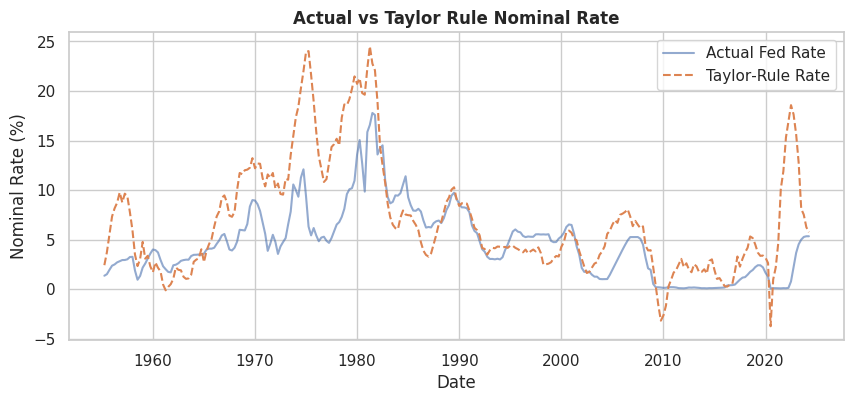

In [ ]:
#Using Taylor Rule as a basic comparison to the RL-learned rule.
def taylor_rule(pi, gap, r_star=2.0, pi_star=2.0, alpha_pi=1.5, alpha_y=0.5):
    """
    Compute the Taylor‐rule rate.
    pi   : current inflation (%)
    gap  : current output gap (%)
    returns nominal rate (%)
    """
    rate = (r_star + pi + alpha_pi*(pi - pi_star) + alpha_y*gap)
    return rate

#Computing the Taylor prescription
environment['i_taylor'] = taylor_rule(
    pi = environment['inflation'],
    gap= environment['output_gap'],
    r_star=2.0,
    pi_star=2.0,
    alpha_pi=1.5,
    alpha_y=0.5
)

#Computing the central‐bank loss of the Taylor rule
#Using the same quadratic loss as in the environment
omega_pi = 0.5
omega_y  = 0.5

#Loss at each date
environment['loss_taylor'] = -(
    omega_pi * (environment['inflation'] - 2.0)**2
  + omega_y  * (environment['output_gap']  - 0.0)**2
)

environment['penalty_taylor'] = -environment['loss_taylor']

#Summarising performance
mean_penalty = environment['penalty_taylor'].mean()
print(f"Average Taylor penalty (higher = worse): {mean_penalty:.4f}")

plt.figure(figsize=(10,4))
plt.plot(environment.index, environment['bank_rate'], label='Actual Fed Rate', alpha=0.6)
plt.plot(environment.index, environment['i_taylor'], label='Taylor‐Rule Rate', linestyle='--')
plt.legend()
plt.title("Actual vs Taylor Rule Nominal Rate", fontweight="bold")
plt.xlabel("Date")
plt.ylabel("Nominal Rate (%)")
plt.show()

## 5 Evaluation

#### 5.1 DQN Agent performance

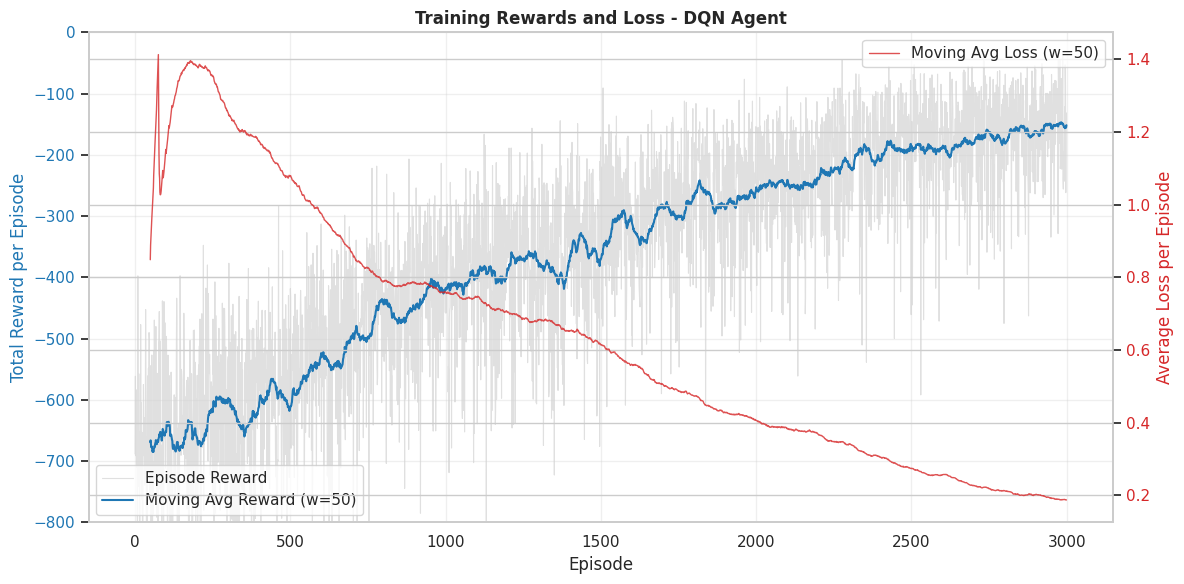

In [ ]:
#Plotting the DQN agent performance
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_ylim(-800, 0)

color = 'tab:blue'
ax1.set_xlabel('Episode')
ax1.set_ylabel('Total Reward per Episode', color=color)
ax1.plot(episode_rewards, label='Episode Reward', color='lightgrey', linewidth=0.8, alpha=0.7)
window = 50
if len(episode_rewards) >= window:
    smoothed_rewards = np.convolve(episode_rewards, np.ones(window)/window, mode='valid')
    plot_indices_rew = np.arange(window - 1, len(episode_rewards))
    ax1.plot(plot_indices_rew, smoothed_rewards, label=f'Moving Avg Reward (w={window})', color=color, linewidth=1.5)
ax1.tick_params(axis='y', labelcolor=color)

ax1.legend(loc='lower left')
ax1.grid(True, alpha=0.3)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Loss per Episode', color=color)
if len(episode_losses) >= window:
    smoothed_losses = np.convolve(episode_losses, np.ones(window)/window, mode='valid')
    plot_indices_loss = np.arange(window - 1, len(episode_losses))
    ax2.plot(plot_indices_loss, smoothed_losses, label=f'Moving Avg Loss (w={window})', color=color, linewidth=1.0, alpha=0.8)
else:
    ax2.plot(episode_losses, label='Avg Episode Loss', color=color, linewidth=1.0, alpha=0.6)

ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Training Rewards and Loss - DQN Agent', fontweight = "bold")
fig.tight_layout()
plt.show()

### Saving DQN and Normalisation Statistics

In [ ]:
save_path = 'economy_dqn_policy_net.pth'
torch.save(agent.policy_net.state_dict(), save_path)
print(f"Saved trained policy network to {save_path}")

NORMALIZATION_MEAN = state_mean
NORMALIZATION_STD = state_std

#### 5.1 DQN Agent vs Taylor Rule and FED rate

Next, we compare the actions of the DQN with the Taylor Rule and actual FED rate from 1955 to 2024. As we see,

In [ ]:
environment['dqn_rate'] =

plt.figure(figsize=(10,4))
plt.plot(environment.index, environment['bank_rate'], label='Actual Fed Rtate', alpha=0.6)
plt.plot(environment.index, environment['i_taylor'], label='Taylor‐Rule Rate', linestyle='--')
plt.plot(environment.index, environment['dqn_rate'], label='DQN Agent Rate', linestyle='--')
plt.legend()
plt.title("DQN Agent rule vs Actual and Taylor Rule Nominal Rate", fontweight="bold")
plt.xlabel("Date")
plt.ylabel("Nominal Rate (%)")
plt.show()

NameError: name 'environment' is not defined

In [ ]:
len(episode_rewards)

3000

## 6 CONCLUSIONS

## 7 REFERENCES


- Ballesteros S., Leone, A., Ramírez, G. and Kaan Y (2025). Optimal Monetary Policy Using
Reinforcement Learning. London School of Economics.

- Debortoli, D., Kim, J., Lindé, J., & Nunes, R. (2019). Designing a simple loss function for central banks: Does a dual mandate make sense?. The Economic Journal, 129(621), 2010-2038.

- Grabowski, J. (2025). Reinforcement Learning in Central Banking. Available in: www.jbgrabowski.com/notebooks/central-bank/

- Hinterlang, N., & Tanzer, A. (2021). Optimal monetary policy using reinforcement
learning. Discussion Paper No 51/2021, Deutsche Bundesbank.

- Joseph, A.. Deep reinforcement learning in a monetary model (2019). Technical report, Bank of England, 2021.

- Li, S. E. (2023). Reinforcement learning for sequential decision and optimal control.

- Sutton, R. S., & Barto, A. G. (1998). Reinforcement learning: An introduction (Vol. 1, No. 1, pp. 9-11). Cambridge: MIT press.

- Svensson, L. E. (2020). Monetary Policy Strategies for the Federal Reserve. International Journal of Central Banking, 16(1):133-193.

-  Taylor, J. (1993). Discretion versus policy rules in practice. Carnegie-Rochester Conference
Series on Public Policy, 39:195–214.


 ## Potential Eval code

In [ ]:
POLICY_NET_SAVE_PATH = Path('economy_dqn_policy_net.pth')
HIDDEN_DIM_USED_IN_TRAINING = 256

if 'environment' not in locals() or not isinstance(environment, pd.DataFrame): raise NameError("DataFrame 'environment' not found.")
if 'ann_model_y' not in locals() or not hasattr(ann_model_y, 'predict'): raise NameError("Fitted model 'ols_model_y' not found.")
if 'ann_model_pi' not in locals() or not hasattr(ann_model_pi, 'predict'): raise NameError("Fitted model 'ols_model_pi' not found.")
if 'EconomyEnv' not in locals() or not issubclass(EconomyEnv, gym.Env): raise NameError("Class 'EconomyEnv' not defined.")
if 'QNetwork' not in locals() or not issubclass(QNetwork, nn.Module): raise NameError("Class 'QNetwork' not defined.")
print(" - Prerequisite variables (environment, models, classes) found.")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f" - Evaluation using device: {device}")

eval_state_mean = torch.tensor(NORMALIZATION_MEAN, dtype=torch.float32, device=device)
eval_state_std = torch.tensor(NORMALIZATION_STD, dtype=torch.float32, device=device)

#Ensuring standard deviation is not 0
if torch.any(eval_state_std < 1e-8):
     print("   Warning: Replacing near-zero std deviation values with 1.0 for normalization.")
     eval_state_std[eval_state_std < 1e-8] = 1.0
print(f" - Normalization Mean: {eval_state_mean.cpu().numpy()}")
print(f" - Normalization Std: {eval_state_std.cpu().numpy()}")

#Instantiating the policy network structure
#Getting state/action dimensions from a temporary env instance
try:
    _temp_env = EconomyEnv(ann_model_y, ann_model_pi, environment.head()) #Using head for speed
    eval_state_dim = _temp_env.observation_space.shape[0]
    eval_action_dim = _temp_env.action_space.n
    _temp_env.close()
except Exception as e:
    print(f"Error instantiating temporary environment to get dimensions: {e}")
    raise

eval_policy_net = QNetwork(eval_state_dim, eval_action_dim, HIDDEN_DIM_USED_IN_TRAINING).to(device)

#Loading the saved weights
if not POLICY_NET_SAVE_PATH.is_file():
    raise FileNotFoundError(f"Saved model not found at: {POLICY_NET_SAVE_PATH}")
eval_policy_net.load_state_dict(torch.load(POLICY_NET_SAVE_PATH, map_location=device))
eval_policy_net.eval() # Set network to evaluation mode (disables dropout, etc.)
print(f" - Loaded trained policy network from {POLICY_NET_SAVE_PATH}")

In [ ]:
#Defining Policy Functions
print("Step 1.2: Defining policy functions...")

#a) DQN Agent's Greedy Policy
def get_dqn_greedy_action(state):
    """Takes a raw state, normalizes it, and returns the greedy action index from the loaded DQN."""
    with torch.no_grad(): # No need to track gradients during evaluation
        state_tensor = torch.tensor(state, dtype=torch.float32, device=device)
        # Normalize state using loaded stats
        normalized_state = (state_tensor - eval_state_mean) / eval_state_std
        # Add batch dimension, get Q-values, find best action index
        action = eval_policy_net(normalized_state.unsqueeze(0)).max(1)[1].view(1, 1)
        return action.item()

#b) Taylor Rule Policy
INFLATION_TARGET = 2.0
EQUILIBRIUM_REAL_RATE = 2.0 # --- Review This Assumption ---
TAYLOR_ALPHA = 1.5
TAYLOR_BETA = 0.5
print(f" - Taylor Rule Parameters: target={INFLATION_TARGET}, r*={EQUILIBRIUM_REAL_RATE}, alpha={TAYLOR_ALPHA}, beta={TAYLOR_BETA}")

def calculate_taylor_rate(inflation, output_gap):
    """Calculates the target interest rate based on the Taylor Rule."""
    #Accessing parameters from the outer scope
    rate = inflation + EQUILIBRIUM_REAL_RATE + TAYLOR_ALPHA * (inflation - INFLATION_TARGET) + TAYLOR_BETA * output_gap
    return rate

def get_taylor_action(state, env):
    """ Gets the discrete action index for the Taylor Rule."""
    #State = [infl_t-1, gap_t-1, rate_t-1, infl_t, gap_t, rate_t]
    current_inflation = state[3]
    current_output_gap = state[4]
    taylor_rate = calculate_taylor_rate(current_inflation, current_output_gap)
    #Finding closest discrete action in the specific env instance passed
    min_rate, max_rate = env.values[0], env.values[-1]
    clipped_rate = np.clip(taylor_rate, min_rate, max_rate)
    closest_action_index = np.argmin(np.abs(env.values - clipped_rate))
    return closest_action_index

In [ ]:
#Instantiating Evaluation Environment
print("Step 1.3: Instantiating shared evaluation environment...")
#Using one environment instance for all evaluations for consistency
eval_env = EconomyEnv(
    historical_df=environment,
    model_y= ann_model_y,
    model_pi= ann_model_pi,
    max_steps=50
)

In [ ]:
#Running Simulations
print("\n--- Section 2: Running Simulations ---")

# --- 2.1: Define Episode Runner ---
def run_episode(env, policy_func, start_seed):
    """Runs one episode, returns reward and trajectory."""
    state, info = env.reset(seed=start_seed)
    episode_reward = 0
    terminated, truncated = False, False
    # Store initial state from info dict for completeness
    trajectory = {
        'state': [state], 'action': [], 'reward': [],
        'inflation': [info.get('inflation', np.nan)],
        'output_gap': [info.get('output_gap', np.nan)],
        'bank_rate': [info.get('bank_rate', np.nan)] # Rate at start (t-1)
    }
    action_values_taken = [] # Store the actual rate values chosen

    while not terminated and not truncated:
        # Get action index from the specific policy function
        action_idx = policy_func(state)
        action_values_taken.append(env.values[action_idx]) # Log the rate value chosen

        # Step environment
        observation, reward, terminated, truncated, info = env.step(action_idx)

        # Log results of this step
        # Note: info contains inflation/gap/rate *at the end* of the step (t+1)
        # Action taken was based on state *before* this step (t)
        trajectory['state'].append(observation)
        trajectory['action'].append(action_idx) # Store index
        trajectory['reward'].append(reward)
        trajectory['inflation'].append(info.get('inflation', np.nan))
        trajectory['output_gap'].append(info.get('output_gap', np.nan))
        trajectory['bank_rate'].append(info.get('bank_rate', np.nan)) # Rate chosen for *next* step

        state = observation
        episode_reward += reward

    # Add the list of actual action rate values to the trajectory for later analysis
    trajectory['action_values'] = action_values_taken

    return episode_reward, trajectory

# --- 2.2: Run Multiple Episodes ---
NUM_EVAL_EPISODES = 100 # More episodes give more reliable averages
eval_seeds = [2025 + i for i in range(NUM_EVAL_EPISODES)] # Consistent starting points

dqn_results = []
taylor_results = []

print(f"Step 2.2: Running {NUM_EVAL_EPISODES} episodes for each policy...")

for i, seed in enumerate(eval_seeds):
    if (i + 1) % (NUM_EVAL_EPISODES // 5) == 0: # Print progress periodically
        print(f"  Running episode {i+1}/{NUM_EVAL_EPISODES}...")

    # DQN Run
    dqn_reward, dqn_traj = run_episode(eval_env, get_dqn_greedy_action, seed)
    dqn_results.append({'reward': dqn_reward, 'trajectory': dqn_traj})

    # Taylor Run - requires wrapping function to match expected signature
    taylor_policy_func_eval = lambda s: get_taylor_action(s, eval_env)
    taylor_reward, taylor_traj = run_episode(eval_env, taylor_policy_func_eval, seed)
    taylor_results.append({'reward': taylor_reward, 'trajectory': taylor_traj})

print("Evaluation simulations complete.")

In [ ]:
print("\n--- Section 3: Calculating and Comparing Metrics ---")

# --- 3.1: Define Metrics Calculation Function ---
def calculate_metrics(results, inflation_target=2.0, gap_target=0.0):
    """Calculates average metrics across evaluated episodes."""
    rewards = [r['reward'] for r in results]
    avg_reward = np.mean(rewards)
    std_reward = np.std(rewards)

    # Store statistics for variables *during* the episodes
    all_infl, all_gap, all_rate_values, all_rate_changes = [], [], [], []
    for r in results:
        traj = r['trajectory']
        # Use values from step 1 onwards (results of policy actions)
        infl_traj = traj['inflation'][1:]
        gap_traj = traj['output_gap'][1:]
        # Use the actual rate values chosen by the policy
        rate_traj = traj['action_values'] # Rates chosen at steps 0 to T-1

        all_infl.extend(infl_traj)
        all_gap.extend(gap_traj)
        all_rate_values.extend(rate_traj)
        if len(rate_traj) > 1:
            all_rate_changes.extend(np.diff(rate_traj))

    metrics = {
        'Avg Cumulative Reward': avg_reward,
        'Std Dev Reward': std_reward,
        'Avg Inflation (%)': np.mean(all_infl),
        'Std Dev Inflation (%)': np.std(all_infl),
        'Avg Output Gap (%)': np.mean(all_gap),
        'Std Dev Output Gap (%)': np.std(all_gap),
        'Avg Interest Rate (%)': np.mean(all_rate_values),
        'Std Dev Interest Rate (%)': np.std(all_rate_values),
        'Std Dev Rate Changes (%)': np.std(all_rate_changes) if all_rate_changes else 0,
        # Loss components (lower is better)
        'Avg Squared Infl Dev': np.mean([(inf - inflation_target)**2 for inf in all_infl]),
        'Avg Squared Gap Dev': np.mean([(g - gap_target)**2 for g in all_gap]),
    }
    # Calculate overall loss (should relate closely to negative reward)
    metrics['Avg Total Loss'] = 0.5 * metrics['Avg Squared Infl Dev'] + 0.5 * metrics['Avg Squared Gap Dev']
    return metrics

# --- 3.2: Calculate Metrics for Each Policy ---
print("Step 3.2: Calculating metrics...")
dqn_metrics = calculate_metrics(dqn_results)
taylor_metrics = calculate_metrics(taylor_results)

# --- 3.3: Compare Metrics (Quantitative Analysis) ---
print("Step 3.3: Comparing metrics...")
comparison_df = pd.DataFrame({'DQN Agent': dqn_metrics, 'Taylor Rule': taylor_metrics})

print("\n" + "="*40)
print("   Performance Metrics Comparison")
print("="*40)
print(comparison_df.round(3)) # Print rounded results
print("="*40)
print("\nExplanation:")
print(" - Higher 'Avg Cumulative Reward' (closer to 0) is better.")
print(" - Lower 'Std Dev ...' generally indicates more stability.")
print(" - Lower 'Avg Squared ... Dev' means closer tracking of targets.")
print(" - Lower 'Avg Total Loss' is better.")
print("-" * 40)

# --- 3.4: Comparison with Historical Data (Optional but Recommended) ---
# You can calculate the same metrics on your *actual* historical data
# over periods corresponding to your simulation length (50 steps = 12.5 years).
# Example: Calculate volatility of actual Fed Funds rate changes.
# historical_rate_changes = np.diff(environment_input_df['bank_rate'])
# historical_rate_change_vol = np.std(historical_rate_changes)
# print(f"\nHistorical Interest Rate Change Volatility: {historical_rate_change_vol:.3f}")
# Compare this to 'Std Dev Rate Changes' in the table for DQN and Taylor.

In [ ]:
print("\n--- Section 4: Plotting Example Trajectory ---")

# --- 4.1: Select and Plot an Episode ---
episode_idx_to_plot = 0 # Choose an episode index (e.g., 0, or one with interesting dynamics)
print(f"Step 4.1: Plotting trajectory for evaluation episode index {episode_idx_to_plot} (Seed: {eval_seeds[episode_idx_to_plot]})")

try:
    dqn_traj_plot = dqn_results[episode_idx_to_plot]['trajectory']
    taylor_traj_plot = taylor_results[episode_idx_to_plot]['trajectory']

    # Create time steps axis (episode length = max_steps)
    steps = np.arange(len(dqn_traj_plot['reward'])) # Length of actions/rewards

    fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)
    fig.suptitle(f'Example Episode Trajectory (Start Seed: {eval_seeds[episode_idx_to_plot]})', fontsize=16)

    # Plot Inflation (values at the *end* of each step)
    axes[0].plot(steps, dqn_traj_plot['inflation'][1:], label='DQN Agent', color='blue', marker='.', markersize=4, linestyle='-')
    axes[0].plot(steps, taylor_traj_plot['inflation'][1:], label='Taylor Rule', color='orange', marker='.', markersize=4, linestyle='-')
    axes[0].axhline(INFLATION_TARGET, color='red', linestyle='--', label=f'Target ({INFLATION_TARGET}%)')
    axes[0].set_ylabel('Inflation (%)')
    axes[0].legend()
    axes[0].grid(True, alpha=0.5)

    # Plot Output Gap (values at the *end* of each step)
    axes[1].plot(steps, dqn_traj_plot['output_gap'][1:], label='DQN Agent', color='blue', marker='.', markersize=4, linestyle='-')
    axes[1].plot(steps, taylor_traj_plot['output_gap'][1:], label='Taylor Rule', color='orange', marker='.', markersize=4, linestyle='-')
    axes[1].axhline(0.0, color='red', linestyle='--', label='Target (0.0%)')
    axes[1].set_ylabel('Output Gap (%)')
    axes[1].grid(True, alpha=0.5)

    # Plot Interest Rate (actions chosen *at* the start of each step)
    axes[2].step(steps, dqn_traj_plot['action_values'], where='post', label='DQN Agent Rate', color='blue')
    axes[2].step(steps, taylor_traj_plot['action_values'], where='post', label='Taylor Rule Rate', color='orange')
    axes[2].set_ylabel('Interest Rate (%)')
    axes[2].set_xlabel('Simulation Step (Quarters)')
    axes[2].legend()
    axes[2].grid(True, alpha=0.5)
    # Optional: Set y-limit for rate if needed
    # axes[2].set_ylim(bottom=-0.5)


    plt.tight_layout(rect=[0, 0.03, 1, 0.96]) # Adjust layout
    plt.show()

except IndexError:
    print(f"Could not plot episode index {episode_idx_to_plot}. Not enough evaluation episodes run?")
except Exception as e:
    print(f"An error occurred during plotting: {e}")